In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/DigitDetector/Operators.zip -d /content/dataset

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Define the paths and categories for your data
data_dir = "/content/dataset/Operators"  # Update with the path to your images
categories = ["add", "sub", "mul"]
labels = {category: i for i, category in enumerate(categories)}

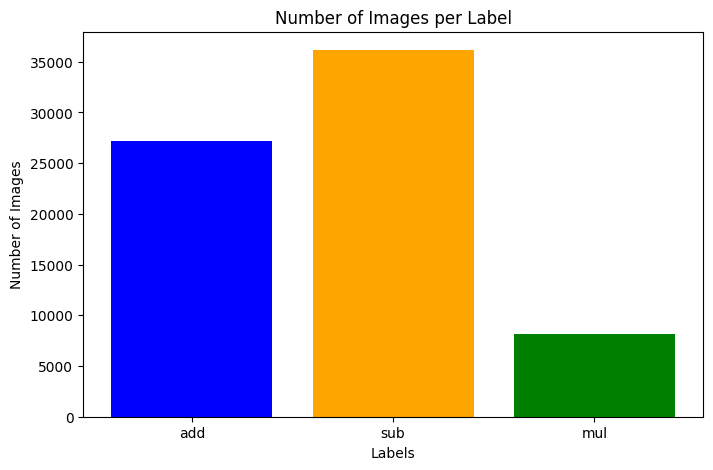

In [ ]:
# Dictionary to store counts
label_counts = {category: 0 for category in categories}

# Count the number of images in each folder
for category in categories:
    folder_path = os.path.join(data_dir, category)
    label_counts[category] = len(os.listdir(folder_path))

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(label_counts.keys(), label_counts.values(), color=['blue', 'orange', 'green'])
plt.title("Number of Images per Label")
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.show()

In [ ]:
# Lists to hold the data and corresponding labels
data = []
targets = []

# Load and preprocess images
for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        if img is not None:  # Check if the image was loaded successfully
            img_resized = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
            img_flattened = img_resized.flatten()  # Flatten to a 1D array
            data.append(img_flattened)
            targets.append(labels[category])

In [ ]:
# Convert lists to numpy arrays for training
X = np.array(data)
y = np.array(targets)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.90%


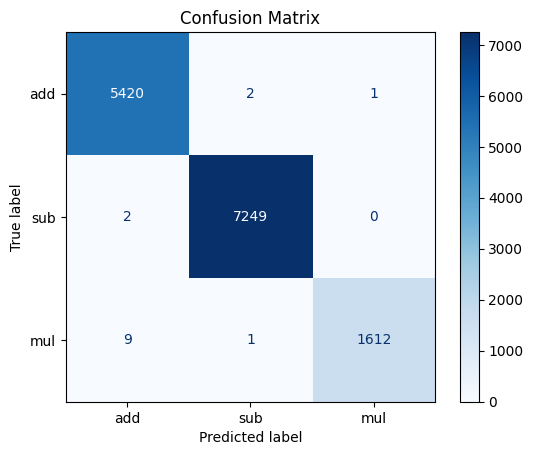

In [ ]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Function to predict label for a new image
def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img_resized = cv2.resize(img, (28, 28)).flatten().reshape(1, -1)
        prediction = clf.predict(img_resized)
        label = list(labels.keys())[list(labels.values()).index(prediction[0])]
        return label
    else:
        return "Error: Image not found"

In [ ]:
import joblib
joblib.dump(clf, "operator_detector.joblib")

['operator_detector.joblib']

In [ ]:
print(predict_image("/content/sample_data/+_3489.jpg"))

add


In [ ]:
print(predict_image("/content/sample_data/-_3677.jpg"))

sub


In [ ]:
print(predict_image("/content/sample_data/1470.jpg"))

mul
